# Should a host's past experience, background and history in the industry affect the way you book an airbnb in sydney?

Sydney Airbnb Data Listing

Karen Stevani (z5573992)

In [22]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
from datetime import datetime

In [23]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
%matplotlib inline

In [30]:
plt.rcParams["figure.figsize"] = (40, 15)

In [31]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

In [33]:
#loading from file
if os.path.isfile("sydney_airbnb_listing.csv"):
    filepath = "sydney_airbnb_listing.csv"
    print("loading from file")
else:
    filepath = "https://data.insideairbnb.com/australia/nsw/sydney/2024-03-16/data/listings.csv.gz"
    print("loading from the internet")

listing_data = pd.read_csv(filepath)
print("done")

loading from file
done


Data Set: "Detailed Sydney Listings data" from insideairbnb.com

Published by: Inside Airbnb, licensed under a Creative Commons Attribution 4.0 International License, on 10 June 2024

This data explores ....

In [34]:
listing_data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1050164598350388320,https://www.airbnb.com/rooms/1050164598350388320,20240316023820,2024-03-18,city scrape,Self service English breakfast,Close to transport airport older style unit ne...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,211218678,...,NaN,NaN,NaN,PID-STRA-61891,f,1,0,1,0,NaN
1,1096082243192434668,https://www.airbnb.com/rooms/1096082243192434668,20240316023820,2024-03-18,city scrape,Apartment in Rushcutters Bay,Full 2 bedroom apartment with balcony. Walking...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,26721338,...,NaN,NaN,NaN,Exempt,f,2,1,1,0,NaN
2,2167538,https://www.airbnb.com/rooms/2167538,20240316023820,2024-03-18,city scrape,"Modern Sydney home near beach,shops",**Availability extremely flexible**<br /><br /...,Queens Park is a safe and friendly neighbourho...,https://a0.muscache.com/pictures/29922910/2399...,11059668,...,5.00,5.00,4.00,NaN,f,1,1,0,0,0.01
3,790607305500629830,https://www.airbnb.com/rooms/790607305500629830,20240316023820,2024-03-18,city scrape,Luxury double room,Relax in this tranquil and stylish space.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,202112801,...,4.77,4.68,4.68,PID-STRA-21723,f,30,5,25,0,2.13
4,641106357139201992,https://www.airbnb.com/rooms/641106357139201992,20240316023820,2024-03-18,city scrape,Chic Studio Apartment in Prime Bondi Location,Immerse yourself in the vibrant atmosphere of ...,Bondi is one of Australia’s most iconic suburb...,https://a0.muscache.com/pictures/prohost-api/H...,279001183,...,3.94,4.94,4.29,PID-STRA-36651,f,217,217,0,0,0.84


In [35]:
listing_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

This dataset provides information on 14274 rows and 75 columns

Sydney Airbnb host trends

In [38]:
listing_data['host_since'] = pd.to_datetime(listing_data['host_since'])
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(listing_data.host_since.min(), date_format_pattern)
latest_date = datetime.strftime(listing_data.host_since.max(), date_format_pattern)
f"Range of the earliest to most recent time a person becomes an airbnb host is: {earliest_date} to {latest_date}"

'Range of the earliest to most recent time a person becomes an airbnb host is: June, 2009 to March, 2024'

<Axes: xlabel='host_location'>

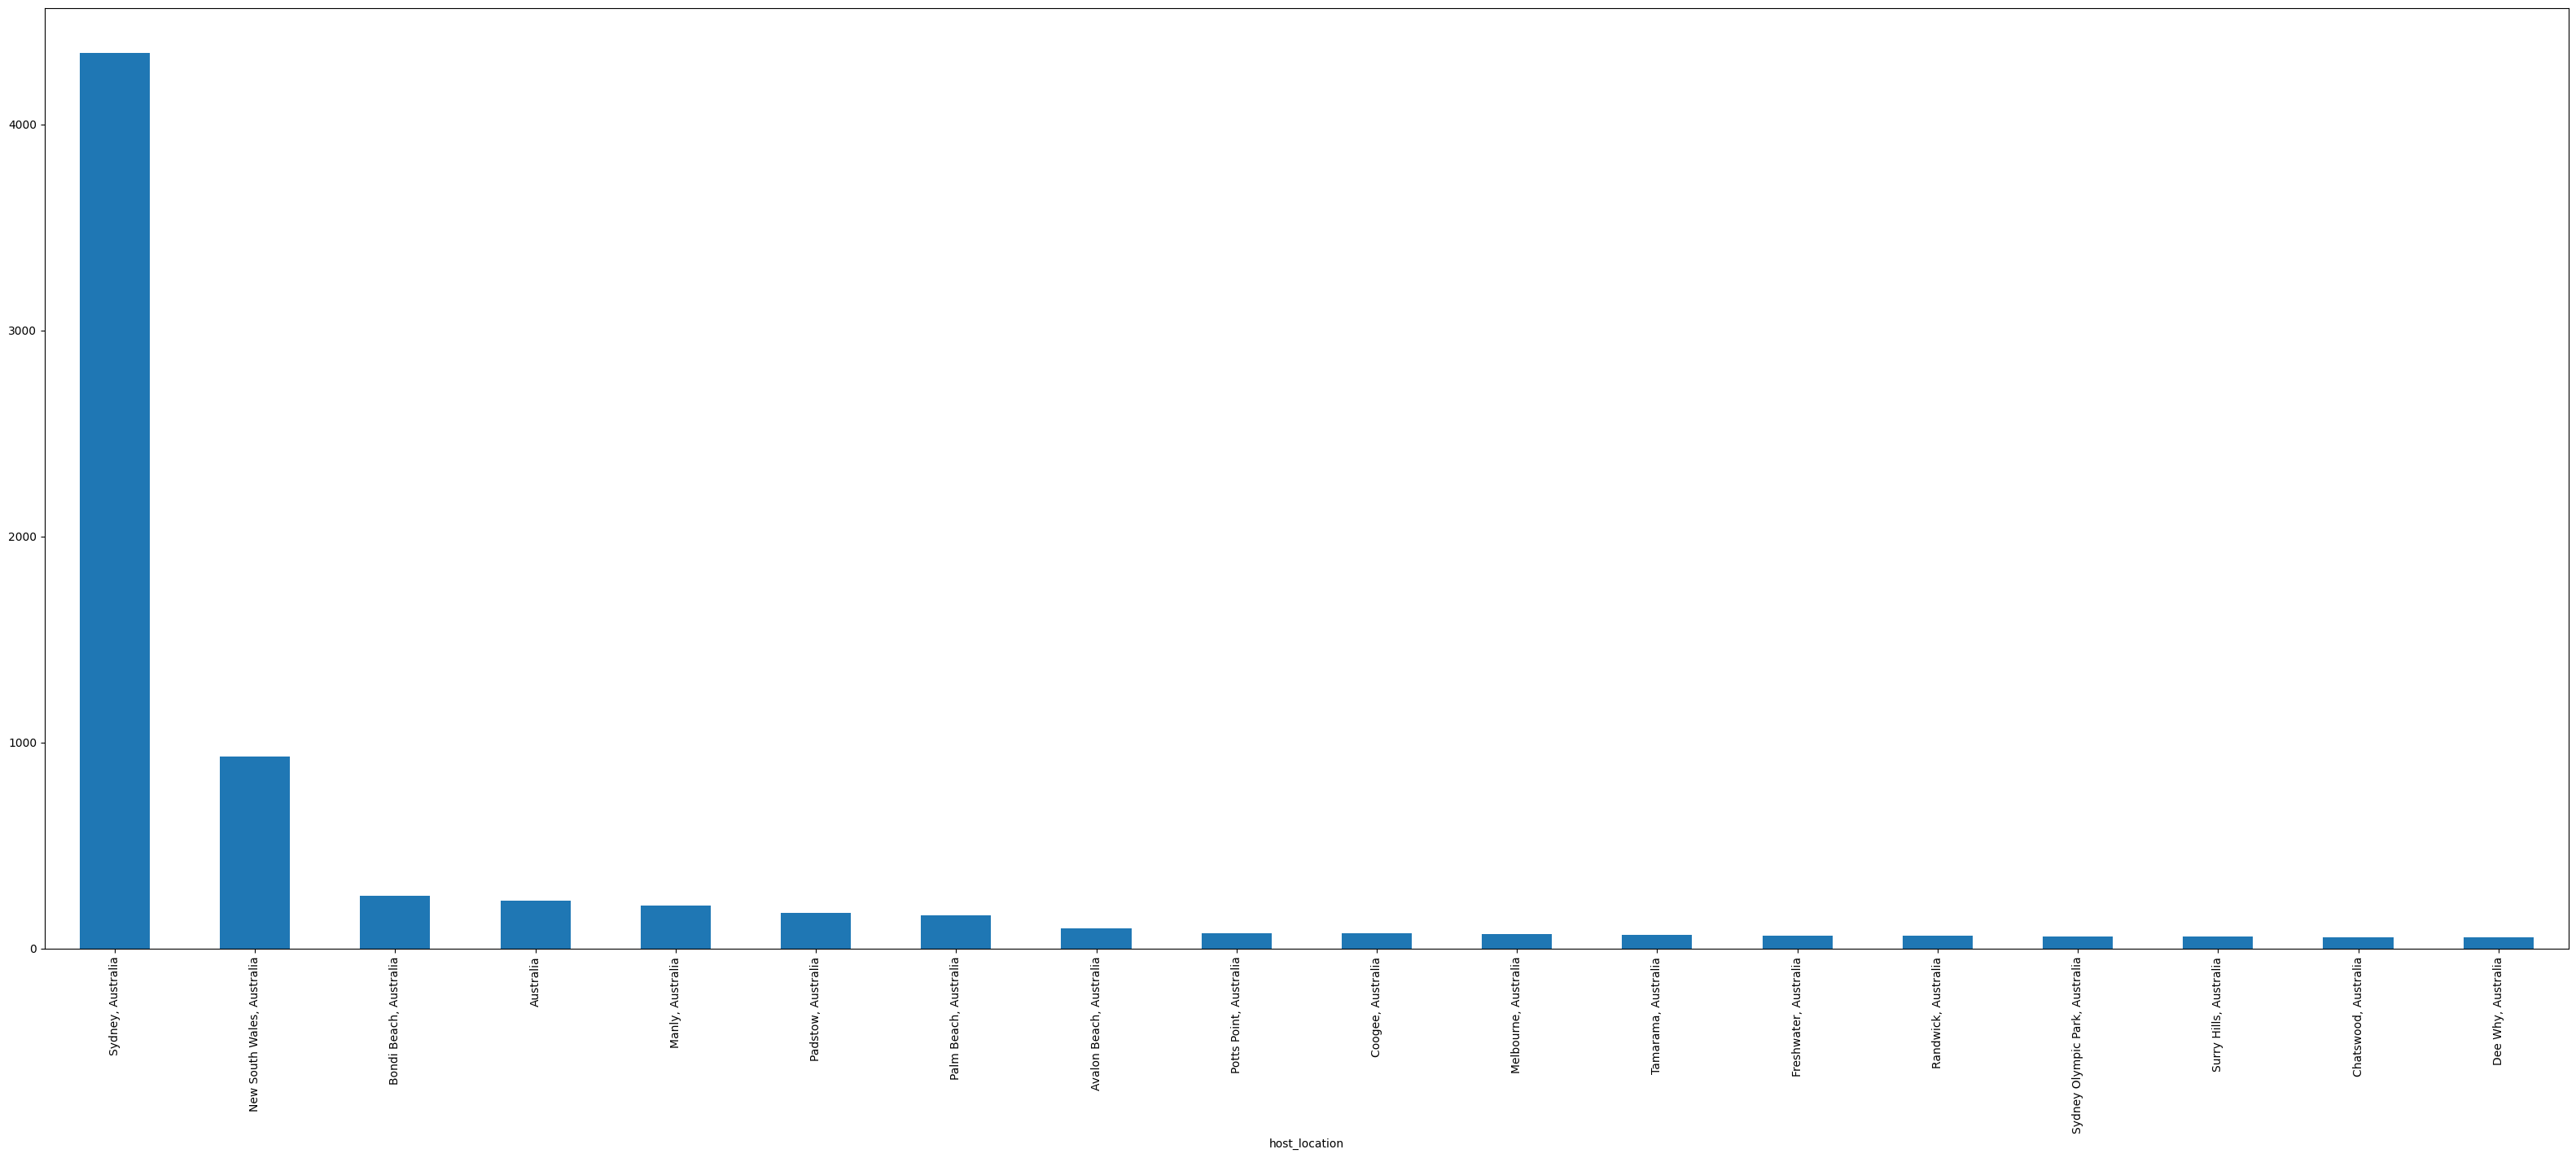

In [39]:
host_location = listing_data.host_location.value_counts() # This makes a series
host_location[host_location > 50].plot(kind="bar")